# Inspiration : 
    Q1) Overall lifters distribution by Gender
    Q2) Does age have an impact on lifting capacity
    Q3) How big of a difference does gender make?
    Q4) How much influence does overall weight have on lifting capacity?
    
    
# Pipeline
    1) Importing Libraries
    2) Data Cleaning
        ~ Dropping Uncessary Columns
        ~ Exploring Missing Values
        ~ Filling Missing values
        
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/Users/shekhartanwar/Downloads/Notebook/Powerlifting/powerlifting-database/openpowerlifting.csv"
data = pd.read_csv(path)
data.shape

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(147147, 17)

In [3]:
data.head(5)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,16,Matthew Martinez,M,Raw,5.0,Y5,30.00,30,NaN,NaN,NaN,NaN,NaN,25.0,25.0,1,51.17
1,6445,Madden Meek,M,Raw,5.0,M-T,36.29,52,NaN,NaN,NaN,NaN,NaN,40.0,40.0,5,60.99
2,4882,Caden Cooper,M,Raw,6.0,Pre Teen,19.69,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DQ,NaN
3,5725,William Whitt,M,Raw,6.0,Juniors,71.67,75,NaN,NaN,NaN,NaN,NaN,183.7,183.7,1,135.24
4,6445,Laila Thomas,F,Raw,6.0,F-T,36.29,44,NaN,NaN,NaN,NaN,NaN,37.5,37.5,5,58.82


In [95]:
data_new = data[['Name','Sex']]
data_new = data_new.drop_duplicates()

# Data Cleaning

Dropping Unecessary Columns

In [4]:
data.columns
data = data.drop(labels = ['Squat4Kg','Bench4Kg','Deadlift4Kg','Wilks'], axis = 1)

In [5]:
data.shape

(147147, 13)

In [6]:
data.tail(5)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place
147142,8164,Philip Pohle,M,Raw,90.0,Junior 20-23,90.00,90,NaN,NaN,250.0,250.0,1
147143,8417,Leona Senyk,F,Raw,90.0,Master 80+,69.70,75,20.0,30.0,42.5,92.5,1
147144,4336,Dan Mason,M,Raw,93.0,Open,90.65,93,165.0,107.5,215.0,487.5,2
147145,19,John Gilmour,M,Raw,95.0,RLM 95-99,90.00,90,NaN,75.0,NaN,75.0,1
147146,19,John Gilmour,M,Raw,95.0,RM 95-99,90.00,90,NaN,75.0,NaN,75.0,1


### Missing Values by Type

In [7]:
print(data.isnull().sum())

MeetID                0
Name                  0
Sex                   0
Equipment             0
Age                   0
Division           9833
BodyweightKg        175
WeightClassKg      2055
BestSquatKg       35910
BestBenchKg       13796
BestDeadliftKg    23250
TotalKg            7838
Place                49
dtype: int64


### Filling the missing values using ffill

In [8]:
data.fillna(method ='ffill',inplace = True)
data.isnull().sum()

MeetID            0
Name              0
Sex               0
Equipment         0
Age               0
Division          0
BodyweightKg      0
WeightClassKg     0
BestSquatKg       8
BestBenchKg       8
BestDeadliftKg    0
TotalKg           0
Place             0
dtype: int64

In [9]:
data.tail(5)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place
147142,8164,Philip Pohle,M,Raw,90.0,Junior 20-23,90.00,90,20.0,30.0,250.0,250.0,1
147143,8417,Leona Senyk,F,Raw,90.0,Master 80+,69.70,75,20.0,30.0,42.5,92.5,1
147144,4336,Dan Mason,M,Raw,93.0,Open,90.65,93,165.0,107.5,215.0,487.5,2
147145,19,John Gilmour,M,Raw,95.0,RLM 95-99,90.00,90,165.0,75.0,215.0,75.0,1
147146,19,John Gilmour,M,Raw,95.0,RM 95-99,90.00,90,165.0,75.0,215.0,75.0,1


# Q1 - Distribution of Powerlifters by Gender in the Sample

[None, None, None, None]

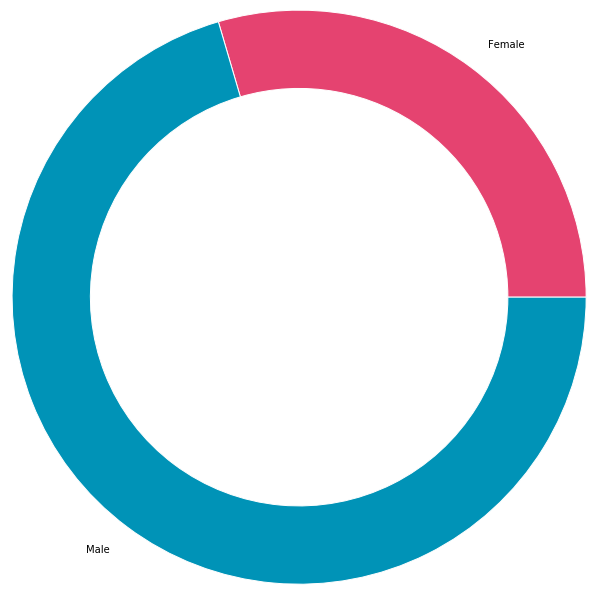

In [104]:

gender_size = data_new.Sex.value_counts().sort_index().tolist()
gender_names = ['Female','Male']
col = ['#c973d0','#4a73ab']
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(gender_size, radius=3.3, labels=gender_names, colors = ['#e54370','#0093b7']) 
plt.setp( mypie, width=0.9, edgecolor='white')


# Intuition : 
    
  Based on the distinct athletes by gender, the sample chosen  had ~70% males  and ~30% females.
  
NOTE : The original dataset had majority of the values missing for rows, so forward/backward fill wouldn't be intuitive to apply in that scenario. Considering this those rows were dropped

# Q2 - Does age have an impact on lifting capacity

### Catgorizing by Age

In [69]:
def squat_calculate(x):
    if(x < 10.0):
        return "05-10"
    if(x >= 10.0 and x < 20.0):
        return "10-20"
    if(x >= 20.0 and x < 30.0):
        return "20-30"
    if(x >= 30.0 and x < 40.0):
        return "30-40"
    if(x >= 40.0 and x < 50.0):
        return "40-50"
    if(x >= 50.0 and x < 60.0):
        return "50-60"
    if(x >= 60.0 and x < 70.0):
        return "60-70"
    if(x >= 70.0 and x < 80.0):
        return "70-80"
    if(x >= 80.0 and x < 90.0):
        return "80-90"
    else:
        return "90-100"
    


data['Agecategory'] = pd.DataFrame(data.Age.apply(lambda x : squat_calculate(x)))


In [70]:
data.head(20)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Agecategory
0,16,Matthew Martinez,M,Raw,5.0,Y5,30.00,30,NaN,NaN,25.00,25.00,1,05-10
1,6445,Madden Meek,M,Raw,5.0,M-T,36.29,52,NaN,NaN,40.00,40.00,5,05-10
2,4882,Caden Cooper,M,Raw,6.0,Pre Teen,19.69,30,NaN,NaN,40.00,40.00,DQ,05-10
3,5725,William Whitt,M,Raw,6.0,Juniors,71.67,75,NaN,NaN,183.70,183.70,1,05-10
4,6445,Laila Thomas,F,Raw,6.0,F-T,36.29,44,NaN,NaN,37.50,37.50,5,05-10
5,6445,Hayden Meek,M,Raw,6.0,M-T,36.29,44,NaN,NaN,50.00,50.00,4,05-10
6,6475,Madden Meek,M,Raw,6.0,Guest,36.29,44,NaN,NaN,27.50,27.50,G,05-10
7,8313,Berlynn Shamblin,F,Raw,6.0,Junior,29.70,44,NaN,NaN,27.50,27.50,G,05-10
8,15,Celleste Lindsay,F,Raw,7.0,RY 6-7,32.11,35,20.00,15.50,42.50,78.00,1,05-10
9,50,Anderson Coleman,M,Raw,7.0,Tested Youth,24.49,39,20.00,15.50,40.82,40.82,1,05-10


### Calculating Average Best [Squat, Bench,Deadligt] by Age Category for Male/Female Athletes

In [74]:
data_male = pd.DataFrame(data[data['Sex'] == 'M'])
data_female = pd.DataFrame(data[data['Sex'] == 'F'])
lifting_capacity_m = pd.DataFrame(data_male.groupby('Agecategory')[['BestSquatKg','BestBenchKg','BestDeadliftKg']].mean()).reset_index()
lifting_capacity_f = pd.DataFrame(data_female.groupby('Agecategory')[['BestSquatKg','BestBenchKg','BestDeadliftKg']].mean()).reset_index()


### Resetting the Indexes

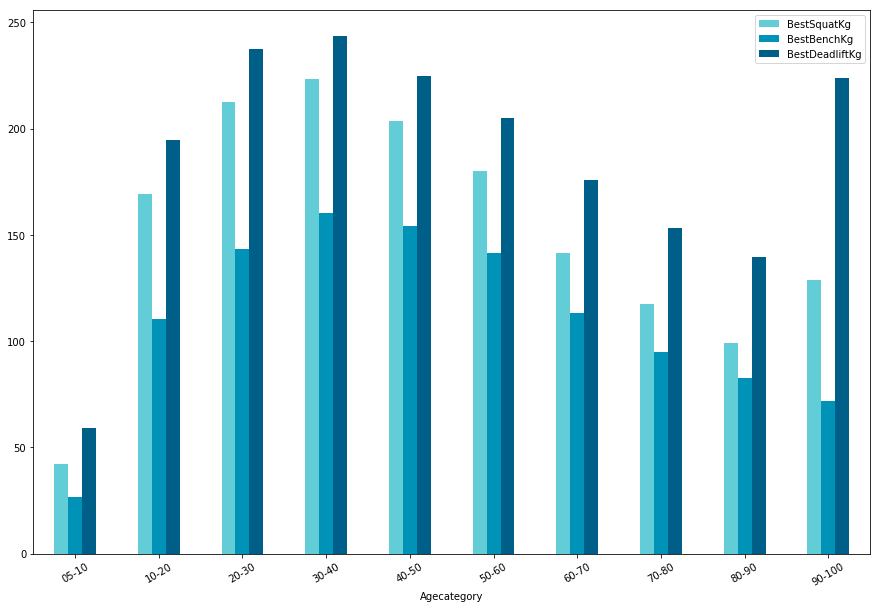

In [81]:
#plt.figure(figsize = (20,10))
lifting_capacity_m.plot(kind = 'bar', color = ['#63cdd7','#0093b7','#005f89'], figsize = (15,10), x = 'Agecategory', rot = 30)


# Intuition : 

For Male Atheletes
age group 30-40 lifted the maximum in either of the categories, followed by age groups 20-30 and 40-50.

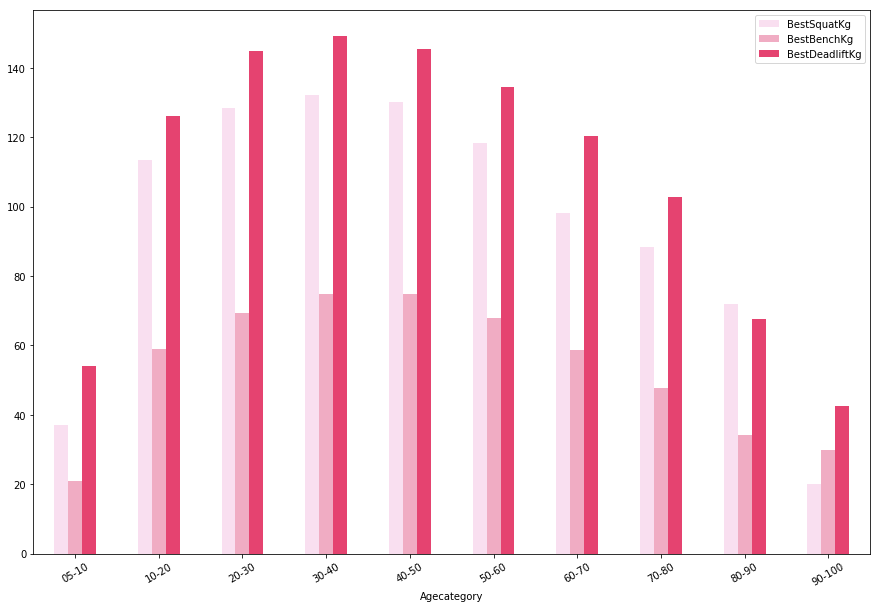

In [82]:
lifting_capacity_f.plot(kind = 'bar', color = ['#f9dff0','#f0acc3','#e54370'], figsize = (15,10), x = 'Agecategory', rot = 30)


# Intuition :

For Female Atheletes the intuition holds true as age group 30-40 lifted the maximum in either of the categories, followed by age groups 20-30 and 40-50.

# Q3 - How big of a difference does gender make?

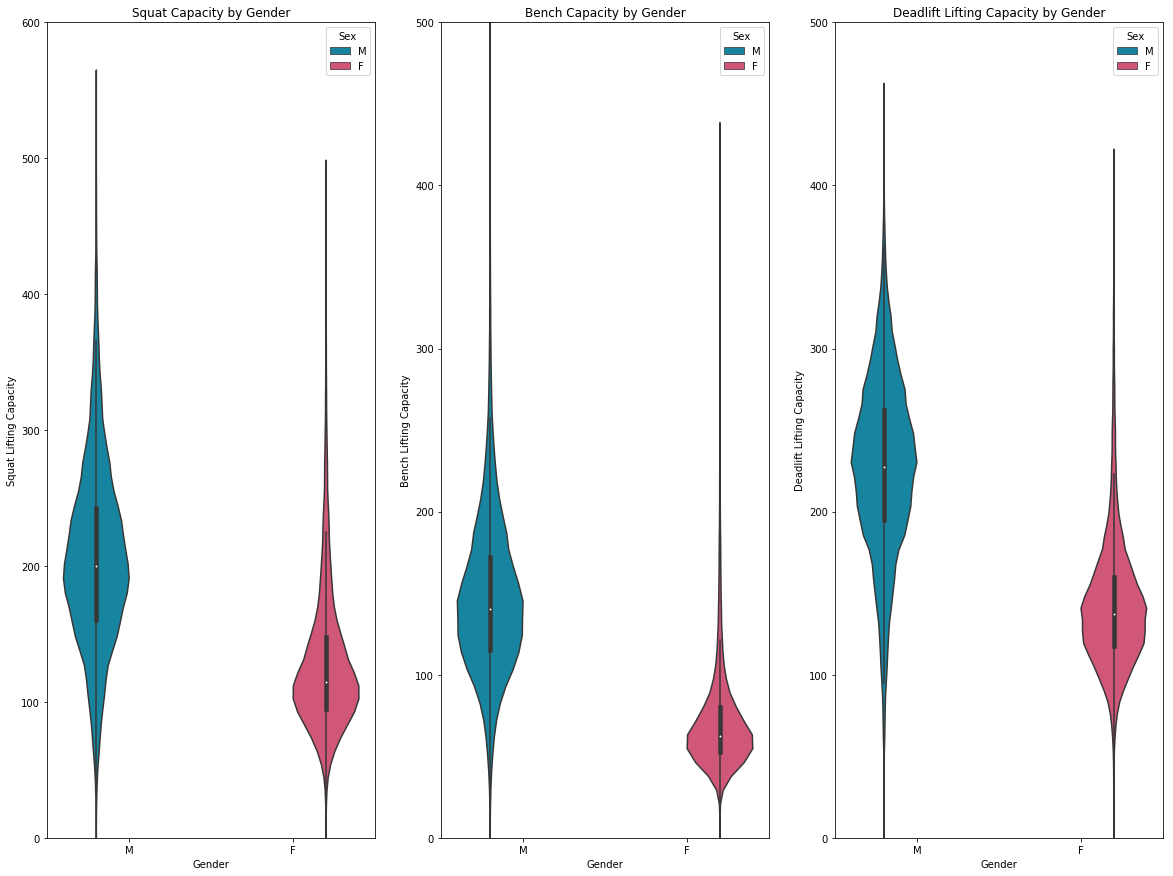

In [18]:
import seaborn as sns
plt.figure(figsize = (20,15))

plt.subplot(1,3,1)

plt.ylim(0,600)
sns.violinplot(data = data, x = 'Sex', y = 'BestSquatKg',hue = 'Sex', scale = 'count',dodge = True, palette = ['#0093b7','#e54370'])
plt.style.use("fast")
plt.title('Squat Capacity by Gender')
plt.xlabel('Gender')
plt.ylabel('Squat Lifting Capacity')


plt.subplot(1,3,2)
plt.ylim(0,500)
plt.style.use("fast")
sns.violinplot(data = data, x = 'Sex', y = 'BestBenchKg',hue = 'Sex',scale = 'count',dodge = True, palette = ['#0093b7','#e54370'])
plt.xlabel('Gender')
plt.ylabel('Bench Lifting Capacity')
plt.title('Bench Capacity by Gender')


plt.subplot(1,3,3)
plt.ylim(0,500)
plt.style.use("fast")
sns.violinplot(data = data, x = 'Sex', y = 'BestDeadliftKg',hue = 'Sex',scale = 'count',dodge = True, palette = ['#0093b7','#e54370'])
plt.xlabel('Gender')
plt.ylabel('Deadlift Lifting Capacity')
plt.title('Deadlift Lifting Capacity by Gender')


plt.show()

# Intuition

Gender played a key role in determining the lifting capacity of the atheletes,
in all the categories i.e. bench, squat and deadlift male atheletes lifted higher 
as compared to their female counterparts.

# Q4 How much influence does overall weight have on lifting capacity?

In [83]:
data_male = pd.DataFrame(data[data['Sex'] == 'M'])
data_female = pd.DataFrame(data[data['Sex'] == 'F'])
bodyw_lcm = pd.DataFrame(data_male.groupby('Agecategory')[['BodyweightKg','BestSquatKg','BestBenchKg','BestDeadliftKg']].mean()).reset_index()
bodyw_lcf = pd.DataFrame(data_female.groupby('Agecategory')[['BodyweightKg','BestSquatKg','BestBenchKg','BestDeadliftKg']].mean()).reset_index()



In [84]:
bodyw_lcm 

,Agecategory,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg
0,05-10,39.406866,42.017049,26.706393,58.905075
1,10-20,83.821735,169.305951,110.339842,194.572360
2,20-30,92.609486,212.343943,143.498357,237.358579
3,30-40,101.197942,223.148457,160.274563,243.655339
4,40-50,102.558801,203.534919,154.287895,224.555107
5,50-60,99.812955,180.026502,141.311082,205.041619
6,60-70,91.925759,141.618893,113.436999,175.735298
7,70-80,87.591684,117.339680,95.068785,153.393085
8,80-90,82.076129,98.963145,82.577258,139.557258
9,90-100,90.162500,128.750000,71.875000,223.750000


In [85]:
bodyw_lcf

,Agecategory,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg
0,05-10,36.198889,36.997885,20.955192,53.938148
1,10-20,66.202749,113.476313,59.123333,126.022844
2,20-30,67.939103,128.525595,69.269148,144.808839
3,30-40,72.409548,132.271257,74.777198,149.266240
4,40-50,72.526195,130.306612,74.835703,145.615170
5,50-60,70.176314,118.386681,68.023054,134.632913
6,60-70,67.419757,98.297001,58.712523,120.431307
7,70-80,66.860421,88.282617,47.733925,102.908364
8,80-90,72.165000,72.083333,34.166667,67.500000
9,90-100,69.700000,20.000000,30.000000,42.500000


### Total Lifting Capacity

In [86]:
bodyw_lcm['Total'] = bodyw_lcm['BestSquatKg'] + bodyw_lcm['BestBenchKg']+bodyw_lcm['BestDeadliftKg']
bodyw_lcf['Total'] = bodyw_lcf['BestSquatKg'] + bodyw_lcf['BestBenchKg']+bodyw_lcf['BestDeadliftKg']


In [87]:
bodyw_lcm['wRatio'] = bodyw_lcm['Total']/bodyw_lcm['BodyweightKg']
bodyw_lcf['wRatio'] = bodyw_lcf['Total']/bodyw_lcf['BodyweightKg']


In [108]:
bodyw_lcm

,Agecategory,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,Total,wRatio
0,05-10,39.406866,42.017049,26.706393,58.905075,127.628517,3.238738
1,10-20,83.821735,169.305951,110.339842,194.572360,474.218153,5.657460
2,20-30,92.609486,212.343943,143.498357,237.358579,593.200879,6.405401
3,30-40,101.197942,223.148457,160.274563,243.655339,627.078358,6.196552
4,40-50,102.558801,203.534919,154.287895,224.555107,582.377921,5.678478
5,50-60,99.812955,180.026502,141.311082,205.041619,526.379203,5.273656
6,60-70,91.925759,141.618893,113.436999,175.735298,430.791190,4.686295
7,70-80,87.591684,117.339680,95.068785,153.393085,365.801549,4.176213
8,80-90,82.076129,98.963145,82.577258,139.557258,321.097661,3.912193
9,90-100,90.162500,128.750000,71.875000,223.750000,424.375000,4.706779


In [89]:
bodyw_lcf

,Agecategory,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,Total,wRatio
0,05-10,36.198889,36.997885,20.955192,53.938148,111.891225,3.091013
1,10-20,66.202749,113.476313,59.123333,126.022844,298.622490,4.510726
2,20-30,67.939103,128.525595,69.269148,144.808839,342.603581,5.042804
3,30-40,72.409548,132.271257,74.777198,149.266240,356.314696,4.920825
4,40-50,72.526195,130.306612,74.835703,145.615170,350.757486,4.836287
5,50-60,70.176314,118.386681,68.023054,134.632913,321.042648,4.574801
6,60-70,67.419757,98.297001,58.712523,120.431307,277.440831,4.115127
7,70-80,66.860421,88.282617,47.733925,102.908364,238.924907,3.573488
8,80-90,72.165000,72.083333,34.166667,67.500000,173.750000,2.407677
9,90-100,69.700000,20.000000,30.000000,42.500000,92.500000,1.327116


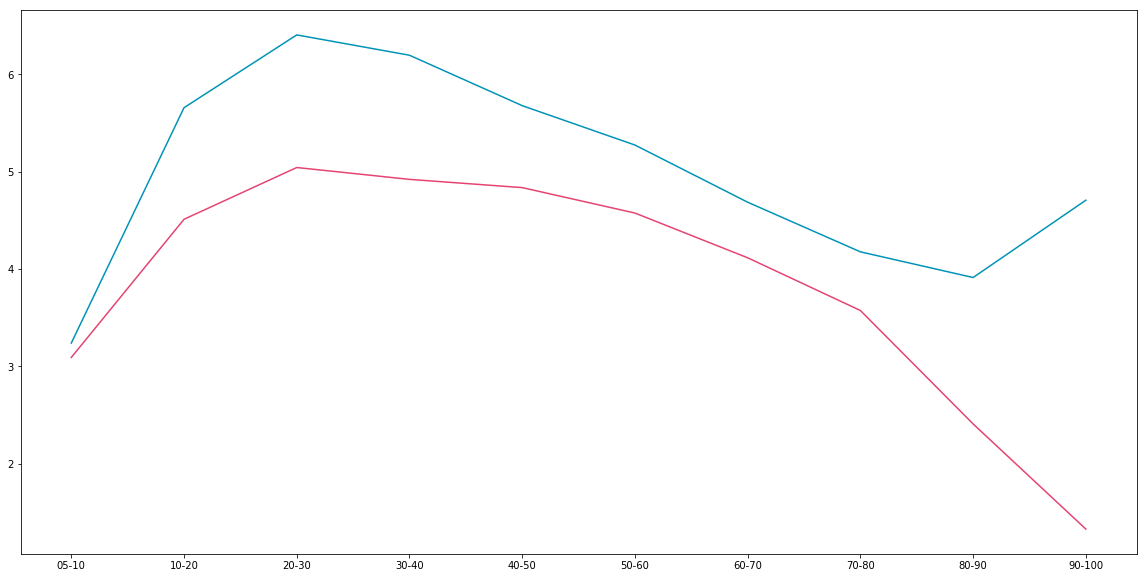

In [125]:
plt.figure(figsize = (20,10))
plt.plot(bodyw_lcm.Agecategory,bodyw_lcm.wRatio, color = '#0093b7')
plt.plot(bodyw_lcf.Agecategory,bodyw_lcf.wRatio, color = '#e54370')
#plt.plot(bodyw_lcf.Agecategory, y = bodyW_lcf.wRatio, kind = 'line')

# Intuition

The idea is to follow the same analogy as ants. Each ant has the ability to lift significantly higher weight in comparison to its own weight.  For the male and female atheletes of all age groups, their lifting capacity as a rtio of their own weight was computed. 


Results showed that for age group 20-30, the ratio of Total Weight lifting capacity to avg weight of atheletes was highest in this category, implying that atletes belonging to this age group could lift the highest weight in comparison to their own weight.

# Fin!